## This notebook explores a sample of the SEER breast cancer data

### First we import the necessary packages-- Pandas, Numpy and Matplotlib

In [14]:
%matplotlib inline

import os
import json
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix, radviz, parallel_coordinates

### In order to make the data easy to read, we define the features and labels for the classification variable. We then import the dataset-- a sample of 10000 cases from the larger breast cancer data we previously wrangled. Once the data is read-in we can use Pandas describe function to get a general understanding of the data. 

In [66]:
FEATURES  = [
    "Birth Year",
    "Age at Diagnosis",
    "Race",
    "Origin",
    "laterality",
    "Radiation",
    "Histrec",
    "ER Status",
    "PR Status",
    "Behanal",
    "Stage",
    "Numprimes",
    "Survival Time",
    "Bucket"
]

LABEL_MAP = {
    0: "< 60 Months",
    1: "60 < months > 120",
    2: "> 120 months",
}

# Read the data into a DataFrame
df = pd.read_csv("clean1.csv", sep=',' , header=0, names=FEATURES)


# Convert class labels into text
for k,v in LABEL_MAP.items():
    df.ix[df.Bucket == k, 'Bucket'] = v

print(df.head(n=5))

df.describe()
    


    Birth Year  Age at Diagnosis  Race  Origin  laterality  Radiation  \
0         1919                82     1       0           1          0   
5         1959                40     1       0           1          0   
8         1931                72     1       0           1          1   
10        1921                84     1       0           1          0   
11        1933                74     1       0           1          1   

    Histrec  ER Status  PR Status  Behanal  Stage  Numprimes  Survival Time  \
0         9          2          0        3      4          1             23   
5         9          2          2        3      1          1            154   
8         9          2          2        3      1          1            104   
10        9          2          2        3      1          1             89   
11        9          2          2        2      0          1             69   

               Bucket  
0         < 60 Months  
5        > 120 months  
8   60 < month

,Birth Year,Age at Diagnosis,Race,Origin,laterality,Radiation,Histrec,ER Status,PR Status,Behanal,Stage,Numprimes,Survival Time
count,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000
mean,1942.575212,57.031342,2.612651,0.264838,1.002001,0.593122,8.743832,1.519101,1.338287,2.928360,1.398304,1.160713,120.349624
std,13.475209,12.930236,10.292738,1.253416,0.044685,0.631462,1.212398,0.851179,0.936114,0.257902,0.840551,0.367283,65.418822
min,1894.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
25%,1933.000000,47.000000,1.000000,0.000000,1.000000,0.000000,9.000000,2.000000,0.000000,3.000000,1.000000,1.000000,72.000000
50%,1943.000000,56.000000,1.000000,0.000000,1.000000,1.000000,9.000000,2.000000,2.000000,3.000000,1.000000,1.000000,111.000000
75%,1952.000000,66.000000,1.000000,0.000000,1.000000,1.000000,9.000000,2.000000,2.000000,3.000000,2.000000,1.000000,166.000000
max,1985.000000,100.000000,99.000000,9.000000,2.000000,5.000000,22.000000,2.000000,2.000000,3.000000,4.000000,2.000000,275.000000


### This next line is meant to help determine the frequency of each class in the data

In [60]:
print df.groupby('Bucket')['Bucket'].count()

SyntaxError: invalid syntax (<ipython-input-60-06245244e21f>, line 2)

### Now we can start using visualizations to explore the data! 
### First up, a histogram of survival time in months:

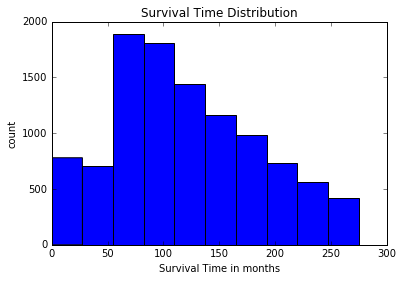

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Survival Time'], bins = 10, range = (df['Survival Time'].min(),df['Survival Time'].max()))
plt.title('Survival Time Distribution')
plt.xlabel('Survival Time in months')
plt.ylabel('count')
plt.show()

### Next, a scatter matrix of all our variables

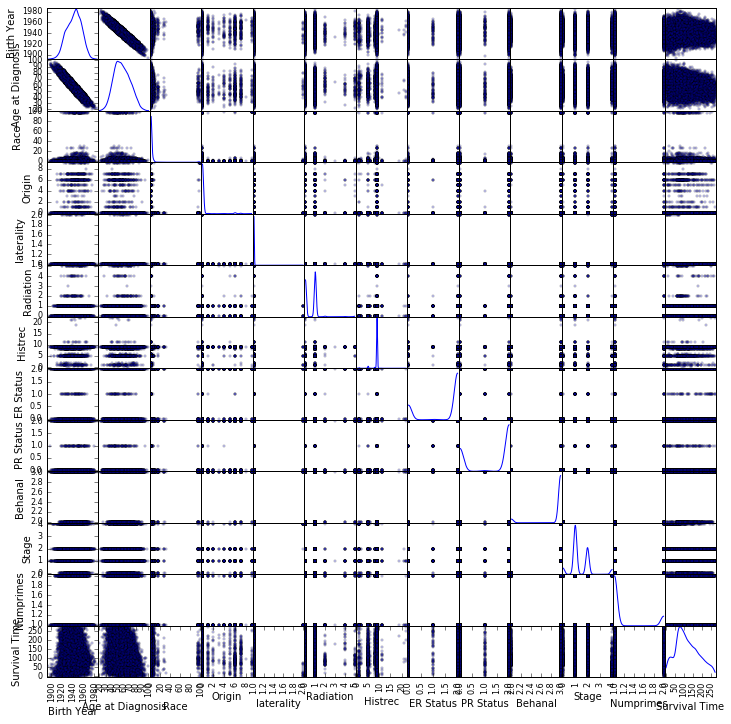

In [61]:
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

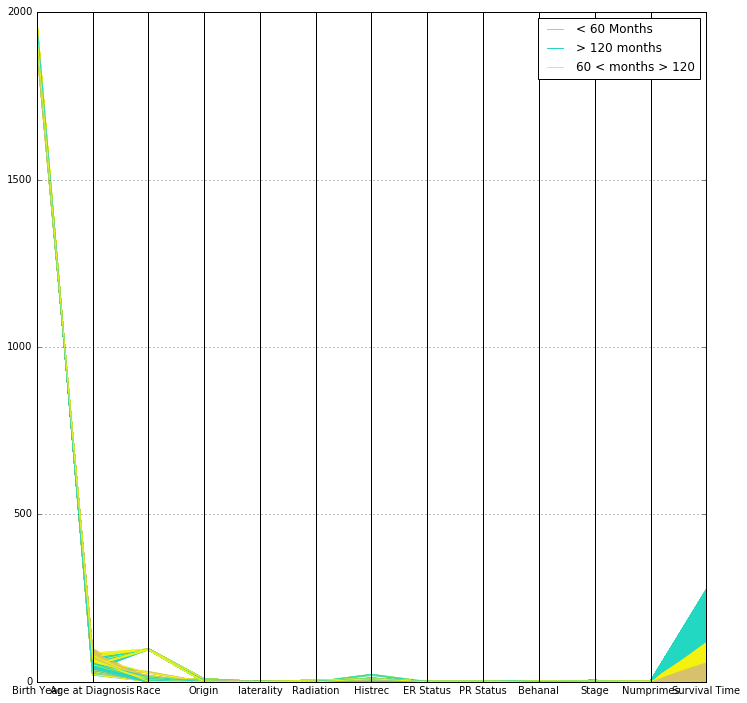

In [63]:
plt.figure(figsize=(12,12))
parallel_coordinates(df, 'Bucket')
plt.show()

### This next plot shows our 3 classess are not actually distinct and there is quite a bit of overlap... maybe thats why our classification machine learning models don't do so well?

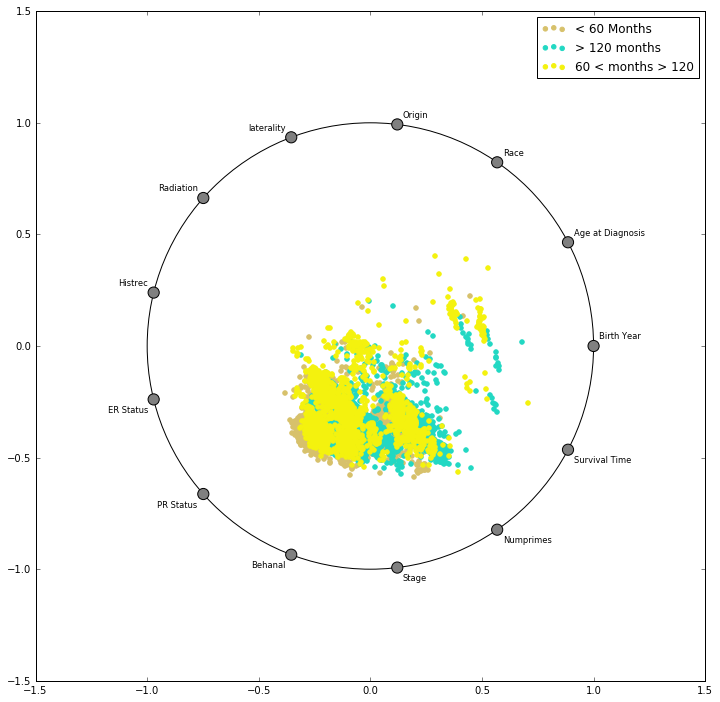

In [64]:
plt.figure(figsize=(12,12))
radviz(df, 'Bucket')
plt.show()